In [1]:
import pandas as pd
from collections import Counter
import ast
import numpy as np
import matplotlib.pyplot as plt
import datetime
from skimage.io import imread
import os
import statistics

In [3]:
train_data = pd.read_csv("/home/data_shares/purrlab/CheXpert/CheXpert-v1.0-small/train.csv", index_col = False)
for i in train_data.columns:
    print(i)

Path
Sex
Age
Frontal/Lateral
AP/PA
No Finding
Enlarged Cardiomediastinum
Cardiomegaly
Lung Opacity
Lung Lesion
Edema
Consolidation
Pneumonia
Atelectasis
Pneumothorax
Pleural Effusion
Pleural Other
Fracture
Support Devices


In [4]:
train_data

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


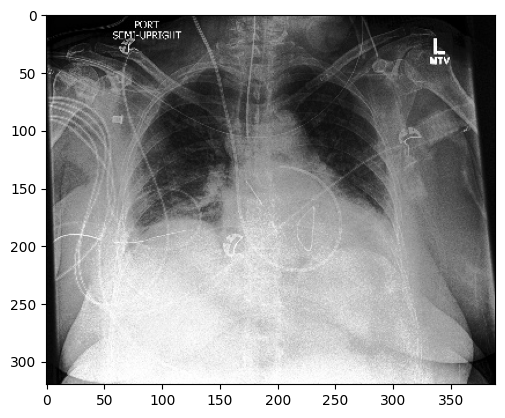

In [5]:
img_id = "patient00123/study1/view1_frontal.jpg"
img_dir = "CheXpert-v1.0-small/train/"
img_path = "/home/data_shares/purrlab/CheXpert/" + img_dir + '/' + img_id
img = imread(img_path)
plt.imshow(img, cmap='gray')
plt.show()

In [6]:
img.shape

(320, 389)

In [7]:
Counter(img.flatten()).most_common()[:10]

[(0, 786),
 (10, 642),
 (11, 630),
 (9, 622),
 (2, 588),
 (235, 578),
 (243, 574),
 (12, 573),
 (245, 573),
 (240, 566)]

In [8]:
upside = train_data[train_data["Path"] == img_dir + img_id]
upside.T

,447
Path,CheXpert-v1.0-small/train/patient00123/study1/...
Sex,Female
Age,65
Frontal/Lateral,Frontal
AP/PA,AP
No Finding,NaN
Enlarged Cardiomediastinum,NaN
Cardiomegaly,NaN
Lung Opacity,NaN
Lung Lesion,NaN


In [10]:
Counter(train_data["Frontal/Lateral"])

Counter({'Frontal': 191027, 'Lateral': 32387})

In [11]:
Counter(train_data["AP/PA"])

Counter({'AP': 161590, nan: 32387, 'PA': 29420, 'LL': 16, 'RL': 1})

In [12]:
Counter(train_data["Sex"])

Counter({'Female': 90777, 'Male': 132636, 'Unknown': 1})

In [13]:
sex = train_data.groupby(['Sex']).size().reset_index()
sex = sex.rename(columns={0: "count"})
sex['Percentage'] = (sex['count']/sex['count'].sum())*100
sex = sex.replace(['M'], 'Male')
sex = sex.replace(['F'], 'Female')
sex

,Sex,count,Percentage
0,Female,90777,40.631742
1,Male,132636,59.367810
2,Unknown,1,0.000448


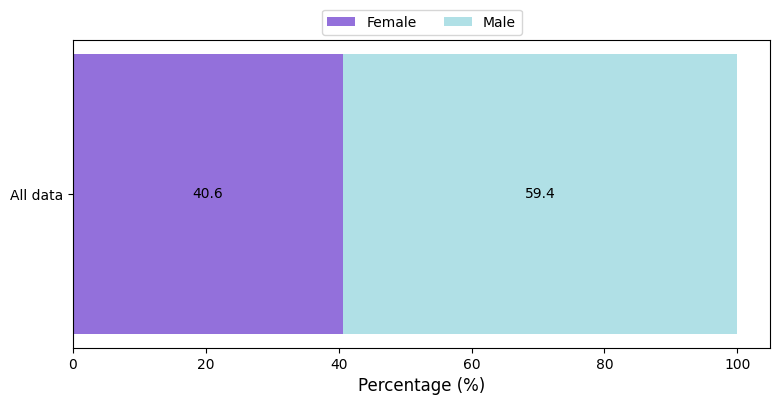

In [14]:

g1 = sex[sex["Sex"]=="Female"]["Percentage"]
g2 = sex[sex["Sex"]=="Male"]["Percentage"]
x = ["All data"]

fig, ax = plt.subplots(figsize=(9,4))
p1 = ax.barh(x, g1, color='mediumpurple', label="Female")
p2 = ax.barh(x, g2, left=g1, color='powderblue', label="Male")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.1f')
ax.bar_label(p2, label_type='center', fmt='%.1f')

plt.savefig("Distribution_sex", bbox_inches="tight")

plt.show()

In [15]:

print(max(train_data["Age"]))
print(min(train_data["Age"]))
print(statistics.mean(train_data["Age"].dropna()))
print(statistics.stdev(train_data["Age"].dropna()))

90
0
60.430653405784774
17.820924664000696


In [16]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

In [17]:
age = train_data.groupby(['AgeGroup']).size().reset_index()
age = age.rename(columns={0: 'count'})
age['Percentage'] = (age['count']/age['count'].sum())*100
age

,AgeGroup,count,Percentage
0,0-10,3,0.001390
1,10-20,1933,0.895592
2,20-30,13408,6.212153
3,30-40,16036,7.429750
4,40-50,25824,11.964695
5,50-60,43450,20.131119
6,60-70,48877,22.645539
7,70-80,38117,17.660250
8,80-90,28187,13.059513


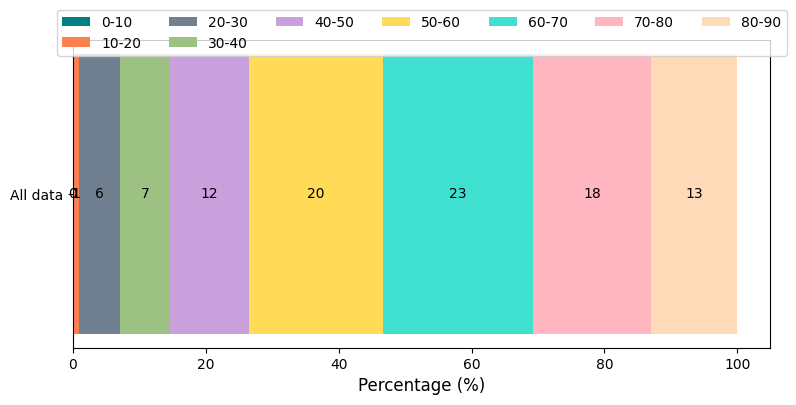

In [18]:
g1 = age['Percentage'][0]
g2 = age['Percentage'][1]
g3 = age['Percentage'][2]
g4 = age['Percentage'][3]
g5 = age['Percentage'][4]
g6 = age['Percentage'][5]
g7 = age['Percentage'][6]
g8 = age['Percentage'][7]
g9 = age['Percentage'][8]

x = ['All data']

fig, ax = plt.subplots(figsize=(9,4))

p1 = ax.barh(x, g1, color='#008080', label=age["AgeGroup"][0])  # Teal
p2 = ax.barh(x, g2, left=(g1), color='#FF7F50', label=age["AgeGroup"][1])  # Coral
p3 = ax.barh(x, g3, left=(g1+g2), color='#708090', label=age["AgeGroup"][2])  # Slate Gray
p4 = ax.barh(x, g4, left=(g1+g2+g3), color='#9dc183', label=age["AgeGroup"][3])  # Sage Green
p5 = ax.barh(x, g5, left=(g1+g2+g3+g4), color='#C9A0DC', label=age["AgeGroup"][4])  # Wisteria (Light Purple)
p6 = ax.barh(x, g6, left=(g1+g2+g3+g4+g5), color='#FFDB58', label=age["AgeGroup"][5])  # Mustard
p7 = ax.barh(x, g7, left=(g1+g2+g3+g4+g5+g6), color='#40E0D0', label=age["AgeGroup"][6])  # Turquoise
p8 = ax.barh(x, g8, left=(g1+g2+g3+g4+g5+g6+g7), color='#FFB6C1', label=age["AgeGroup"][7])  # Light Pink
p9 = ax.barh(x, g9, left=(g1+g2+g3+g4+g5+g6+g7+g8), color='#FFDAB9', label=age["AgeGroup"][8])  # Peach Puff

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=7, fancybox=True)#, shadow=True)

ax.set_xlabel("Percentage (%)", fontsize=12)

ax.bar_label(p1, label_type='center', fmt='%.0f')
ax.bar_label(p2, label_type='center', fmt='%.0f')
ax.bar_label(p3, label_type='center', fmt='%.0f')
ax.bar_label(p4, label_type='center', fmt='%.0f')
ax.bar_label(p5, label_type='center', fmt='%.0f')
ax.bar_label(p6, label_type='center', fmt='%.0f')
ax.bar_label(p7, label_type='center', fmt='%.0f')
ax.bar_label(p8, label_type='center', fmt='%.0f')
ax.bar_label(p9, label_type='center', fmt='%.0f')

plt.savefig("Distribution_sex", bbox_inches="tight")

plt.show()

<Axes: xlabel='AgeGroup'>

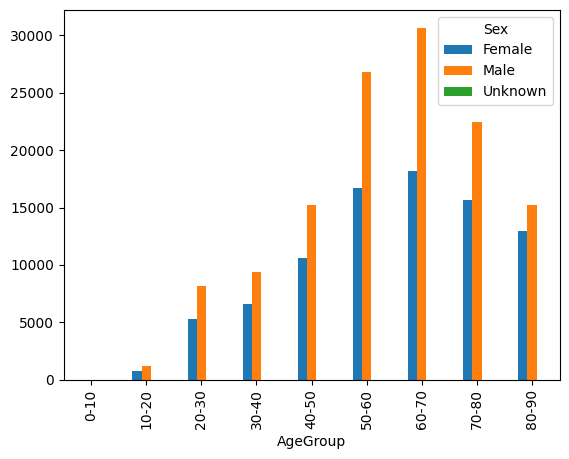

In [20]:
pd.crosstab(train_data['AgeGroup'],train_data['Sex']).plot.bar()

In [22]:
train_data['PatientId'] = train_data['Path'].apply(lambda x: x.split('/')[2].split('patient')[1])

# Extract 'view'
train_data['View'] = train_data['Path'].apply(lambda x: x.split('/')[-1].split('_')[0])

In [23]:
id_counts = train_data['PatientId'].value_counts()
image_count = [id_counts[i] for i in train_data['PatientId']]
train_data["ImageCount"] = image_count

data_many_img = train_data[train_data["ImageCount"]>20]
len(data_many_img)

26721

In [25]:
sex = data_many_img.groupby(["Sex"]).size().reset_index()
sex = sex.rename(columns={0: "count"})
sex["Percentage"] = (sex['count'] / sex['count'].sum()) * 100
sex = sex.replace(['M'], 'Male')
sex = sex.replace(['F'], 'Female')
sex

,Sex,count,Percentage
0,Female,8804,32.947869
1,Male,17917,67.052131


In [27]:
view = data_many_img.groupby(["AP/PA"]).size().reset_index()
view = view.rename(columns={0: "count"})
view["Percentage"] = (view['count'] / sex['count'].sum()) * 100
view

,AP/PA,count,Percentage
0,AP,21534,80.588301
1,LL,1,0.003742
2,PA,2464,9.221212


In [29]:
data_2above_img = train_data[train_data["ImageCount"]>1]
proj = data_2above_img.groupby(['PatientId'])['AP/PA'].unique()
proj_df = pd.DataFrame({'PatientId':proj.index, 'AP/PA':proj.values})

proj_df["Img_counts"] = [id_counts[i] for i in proj_df["PatientId"]]
proj_df

,PatientId,AP/PA,Img_counts
0,00002,"[AP, nan]",3
1,00004,"[PA, nan]",2
2,00005,"[PA, nan, AP]",4
3,00007,[AP],2
4,00008,[AP],2
...,...,...,...
41954,64509,[AP],2
41955,64527,[AP],2
41956,64533,[AP],2
41957,64536,[AP],2


In [30]:
proj_counts = [len(i) for i in proj]
Counter(proj_counts)

Counter({2: 14261, 3: 8762, 1: 18930, 4: 6})

In [31]:

p = [tuple(i.tolist()) for i in proj]
Counter(p)

Counter({('AP', nan): 3036,
         ('PA', nan): 10354,
         ('PA', nan, 'AP'): 7971,
         ('AP',): 18884,
         ('PA', 'AP'): 507,
         ('AP', 'PA', nan): 651,
         ('AP', nan, 'PA'): 47,
         ('AP', 'PA'): 102,
         (nan, 'PA'): 2,
         ('PA',): 46,
         ('PA', 'AP', nan): 79,
         (nan, 'AP'): 258,
         (nan, 'AP', 'PA'): 4,
         ('PA', nan, 'LL', 'AP'): 5,
         ('AP', 'LL', nan): 3,
         ('PA', 'LL', nan): 2,
         ('PA', nan, 'LL'): 4,
         ('PA', 'LL'): 1,
         ('AP', 'PA', nan, 'LL'): 1,
         (nan, 'PA', 'AP'): 1,
         ('AP', 'RL'): 1})

In [32]:
train_data['Enlarged Cardiomediastinum'].value_counts()

Enlarged Cardiomediastinum
 0.0    21638
-1.0    12403
 1.0    10798
Name: count, dtype: int64

In [33]:
train_data['Cardiomegaly'].value_counts()

Cardiomegaly
 1.0    27000
 0.0    11116
-1.0     8087
Name: count, dtype: int64

In [34]:
train_data['Lung Opacity'].value_counts()

Lung Opacity
 1.0    105581
 0.0      6599
-1.0      5598
Name: count, dtype: int64

In [35]:
train_data['Lung Lesion'].value_counts()

Lung Lesion
 1.0    9186
-1.0    1488
 0.0    1270
Name: count, dtype: int64

In [36]:
train_data['Edema'].value_counts()

Edema
 1.0    52246
 0.0    20726
-1.0    12984
Name: count, dtype: int64

In [37]:
train_data['Consolidation'].value_counts()

Consolidation
 0.0    28097
-1.0    27742
 1.0    14783
Name: count, dtype: int64

In [38]:
train_data['Pneumonia'].value_counts()

Pneumonia
-1.0    18770
 1.0     6039
 0.0     2799
Name: count, dtype: int64

In [39]:
train_data['Atelectasis'].value_counts()

Atelectasis
-1.0    33739
 1.0    33376
 0.0     1328
Name: count, dtype: int64

In [40]:
train_data['Pneumothorax'].value_counts()

Pneumothorax
 0.0    56341
 1.0    19448
-1.0     3145
Name: count, dtype: int64

In [41]:
train_data['Pleural Effusion'].value_counts()

Pleural Effusion
 1.0    86187
 0.0    35396
-1.0    11628
Name: count, dtype: int64

In [42]:
train_data['Pleural Other'].value_counts()

Pleural Other
 1.0    3523
-1.0    2653
 0.0     316
Name: count, dtype: int64

In [43]:
train_data['Fracture'].value_counts()

Fracture
 1.0    9040
 0.0    2512
-1.0     642
Name: count, dtype: int64

In [44]:
train_data['Support Devices'].value_counts()

Support Devices
 1.0    116001
 0.0      6137
-1.0      1079
Name: count, dtype: int64